# **Clasificación con Bosques Aleatorios (Random forest)**
UD2. Aprendizaxe Supervisada
MP. Sistemas de Aprendizaxe Automáticos

### **1. Importación de paquetes y dataset**

In [270]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import sqrt
from sklearn.tree import export_graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

Cargamos el dataset wine incluido en el módulo dataset de scikit-learn. El dataset contiene 13 propiedades de los vinos:

alcohol

malic_acid

ash: Ceniza

alcalinity_of_ash: alcalinidad de las cenizas

magnesium

flavanoids


In [271]:
wine_data = load_wine()
# Creo un Dataframe para visualizar mejor los datos
wine_df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Al igual que los árboles de decisión, no es necesario regularizar los datos. Aunque el árbol de decisiones puede manejar los missing values, el algoritmo implementado en scikit-learn no soporta missing values por lo que se deben eliminar. En este ejemplo el dataset ya ha sido pre-procesado y no contiene missing values, por lo que podemos particionar directamente el dataset.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(
wine_data.data, wine_data.target, stratify=wine_data.target, random_state=42)

## **Creación del clasificador**

Algunos de los parámetros que podemos configurar del clasificador:

* n_estimators: el número de árboles que se van a generar

* criterion: La función empleada para determinar la característica que se escoge en cada nodo para realizar la partición.

    'gini'     -> Impureza

    'entropy'  -> Ganancia de información (Shannon)

    'log_loss' -> Ganancia de información (Shannon)


* max_features: El número de características que empleamos en cada árbol (se eligen de forma aleatoria)
    
    Número absoluto (int)

    Fracción (float)

    'auto': sqrt(n_features)

    'sqrt': sqrt(n_features) (por defecto)

    'log2': log2(n_features)

     None: n_features



* max_samples: El número de muestras que se seleccionan en para generar cada árbol (Bootstrap sample).

  None: usa todas las muestras (default)
  value(int): Número de muestras determinado
  value(float): Fracción del número de muestras

También se pueden emplear las técnicas de poda vistas con el árbol de decisiones usando los siguientes parámetros:

* max_deep: Profundidad máxima de los árboles

* min_samples_split: El número de muestras mínimo para seguir bifurcando un nodo.

* min_samples_leaf: El número de muestras mínimo para considerar que el nodo es terminal.




In [273]:
crf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=None, random_state=2)

# **Entrenamiento**

In [274]:
crf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

# **Informe de clasificación**

Visualización de los árboles creados

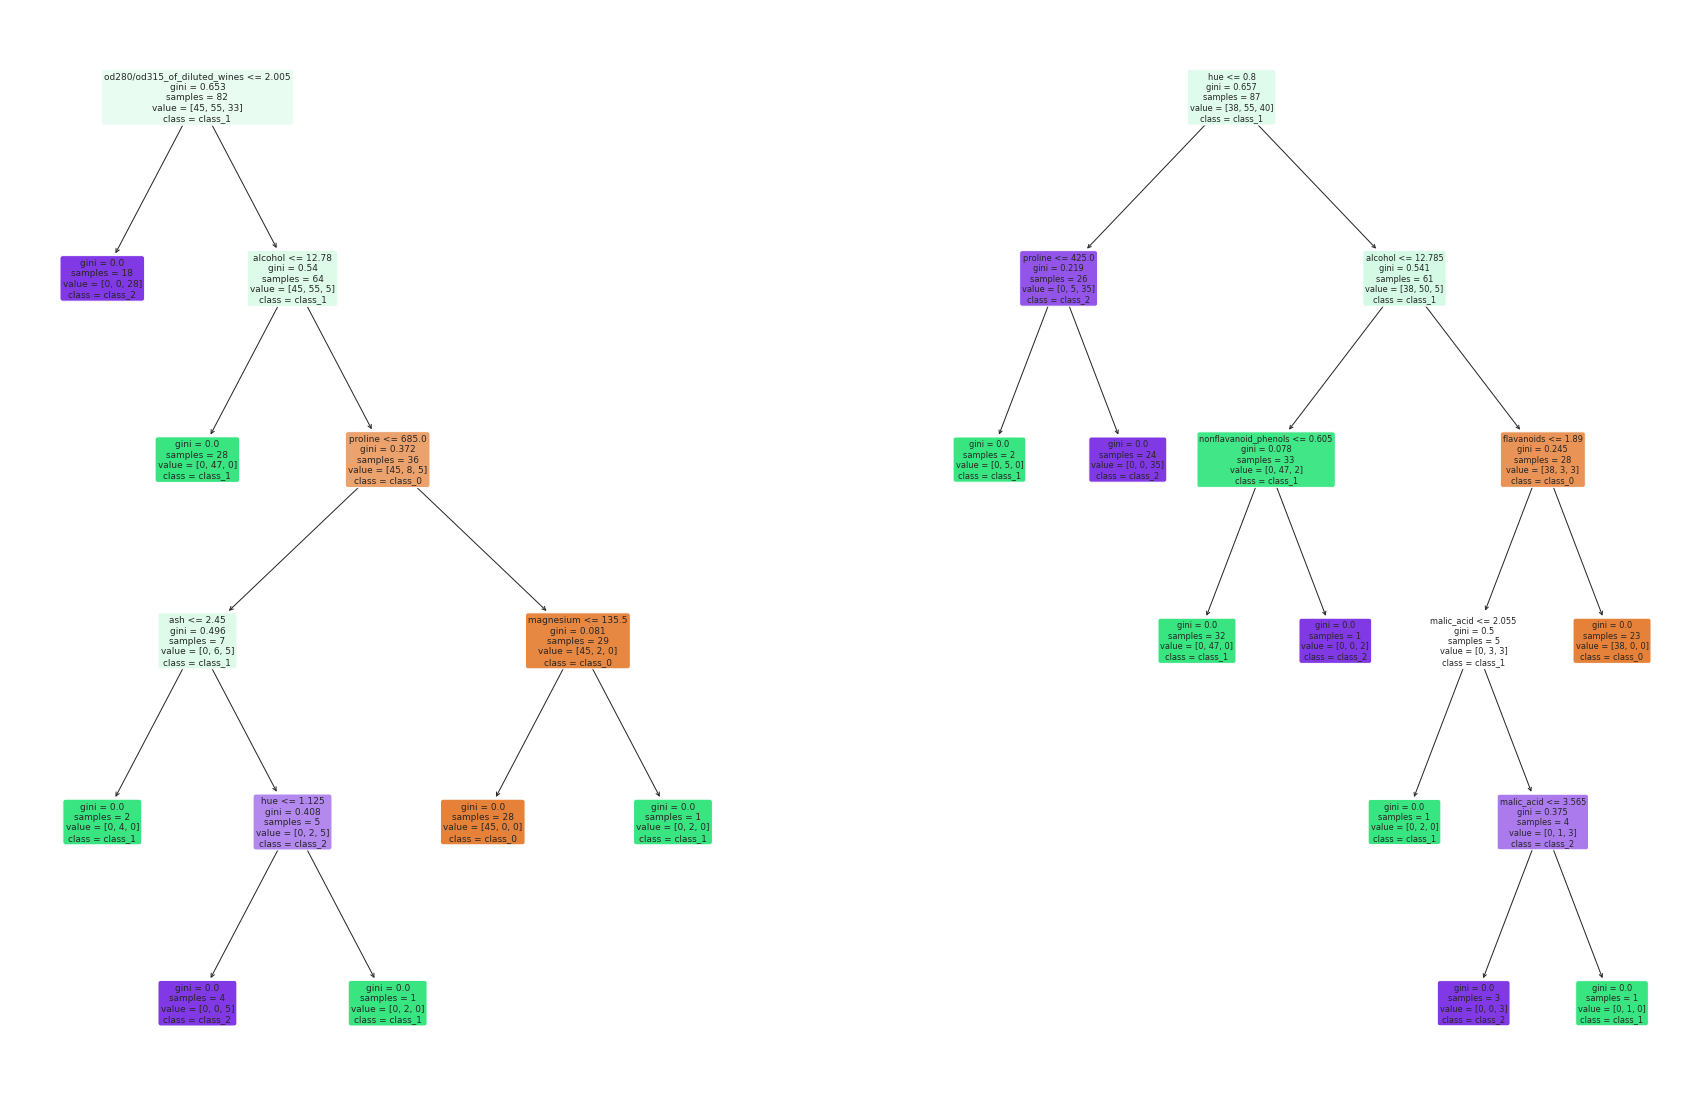

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [275]:
fig, axes = plt.subplots(1,2, figsize=(30,20))

for i in range(len(axes)):
  fig = plt.figure()
  plot_tree(crf.estimators_[i],
            feature_names=wine_data.feature_names,
            class_names=wine_data.target_names,
            filled=True,
            impurity=True,
            rounded=True,
            ax=axes[i])
plt.show()



Precisión del clasificador

In [276]:

print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(crf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(crf.score(X_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 1.000
Precisión en el conjunto de datos de evaluación: 0.978


Matriz de confusión

In [277]:
print(confusion_matrix(y_test, crf.predict(X_test)))

[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]


### **Evaluación de la variación de características**

Vamos a evaluar el impacto en el número de muestras seleccionadas por bootstrap sample

In [278]:

print('Número de muestras del entranamiento {}'.format(X_train.shape[0]))

Número de muestras del entranamiento 133


In [279]:
# Generamos una lista con distinto número de muestras

n_samples = [0.1, 0.2, 0.3, 0.5, 0.8, 0.9]

acc_lst = []

for n in n_samples:

  # Generamos el clasificador
  crf_s = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=n, random_state=2)
  
  # Entrenamos
  crf_s.fit(X_train, y_train)
  acc_lst.append(crf_s.score(X_test, y_test))

acc_lst

[0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Valores muy bajos pueden introducir sesgo. Se recomienda que estén en un rango de 60% 80%. Suele usarse el valor de 2/3 

Ahora evaluamos el número de características empleadas en la generación de cada árbol

In [280]:
print('Número de características {}'.format(X_train.shape[1]))

Número de características 13


In [281]:
# Generamos una lista con distinto número de características

n_samples = [0.1, 0.2, 0.3, 0.5, 0.8, 0.9]

acc_lst = []

for n in n_samples:

  # Generamos el clasificador
  crf_s = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=n , max_samples=None, random_state=2)
  
  # Entrenamos
  crf_s.fit(X_train, y_train)
  acc_lst.append(crf_s.score(X_test, y_test))

acc_lst

[1.0, 0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0]

TAREA: Clasificación Random Forest con dataset Titanic

1. Genera un modelo con el clasificador de Random Forest con los valores por defecto y compara los resultados con los clasificadores de Regresión logística y árbol de decisiones realizando el informe de clasificación.

2. Genera diferentes modelos del clasificador de Random Forest variando los parámetros más importantes. Analiza los resultados y razona si se ajustan al resultado esperado en función de los parámetros seleccionados.







## Importación del dataset y gestión de nulos

In [282]:
import pandas as pd
df_titanic = pd.read_csv("titanic_train.csv", sep = ",")
df_titanic.head(10)


df_titanic.drop(["Cabin"],axis =1,inplace=True)
df_titanic.drop(["Embarked"],axis =1,inplace=True)
df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
df_titanic

df_titanic = pd.get_dummies(df_titanic, columns=['Sex'])


## Entrenamiento de los datos

In [283]:


X = df_titanic.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
y= df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [284]:
crf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=None, random_state=2)
crf.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

## Informe de clasificación

In [285]:
print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(crf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(crf.score(X_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 0.982
Precisión en el conjunto de datos de evaluación: 0.803


[0 1]
['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male']


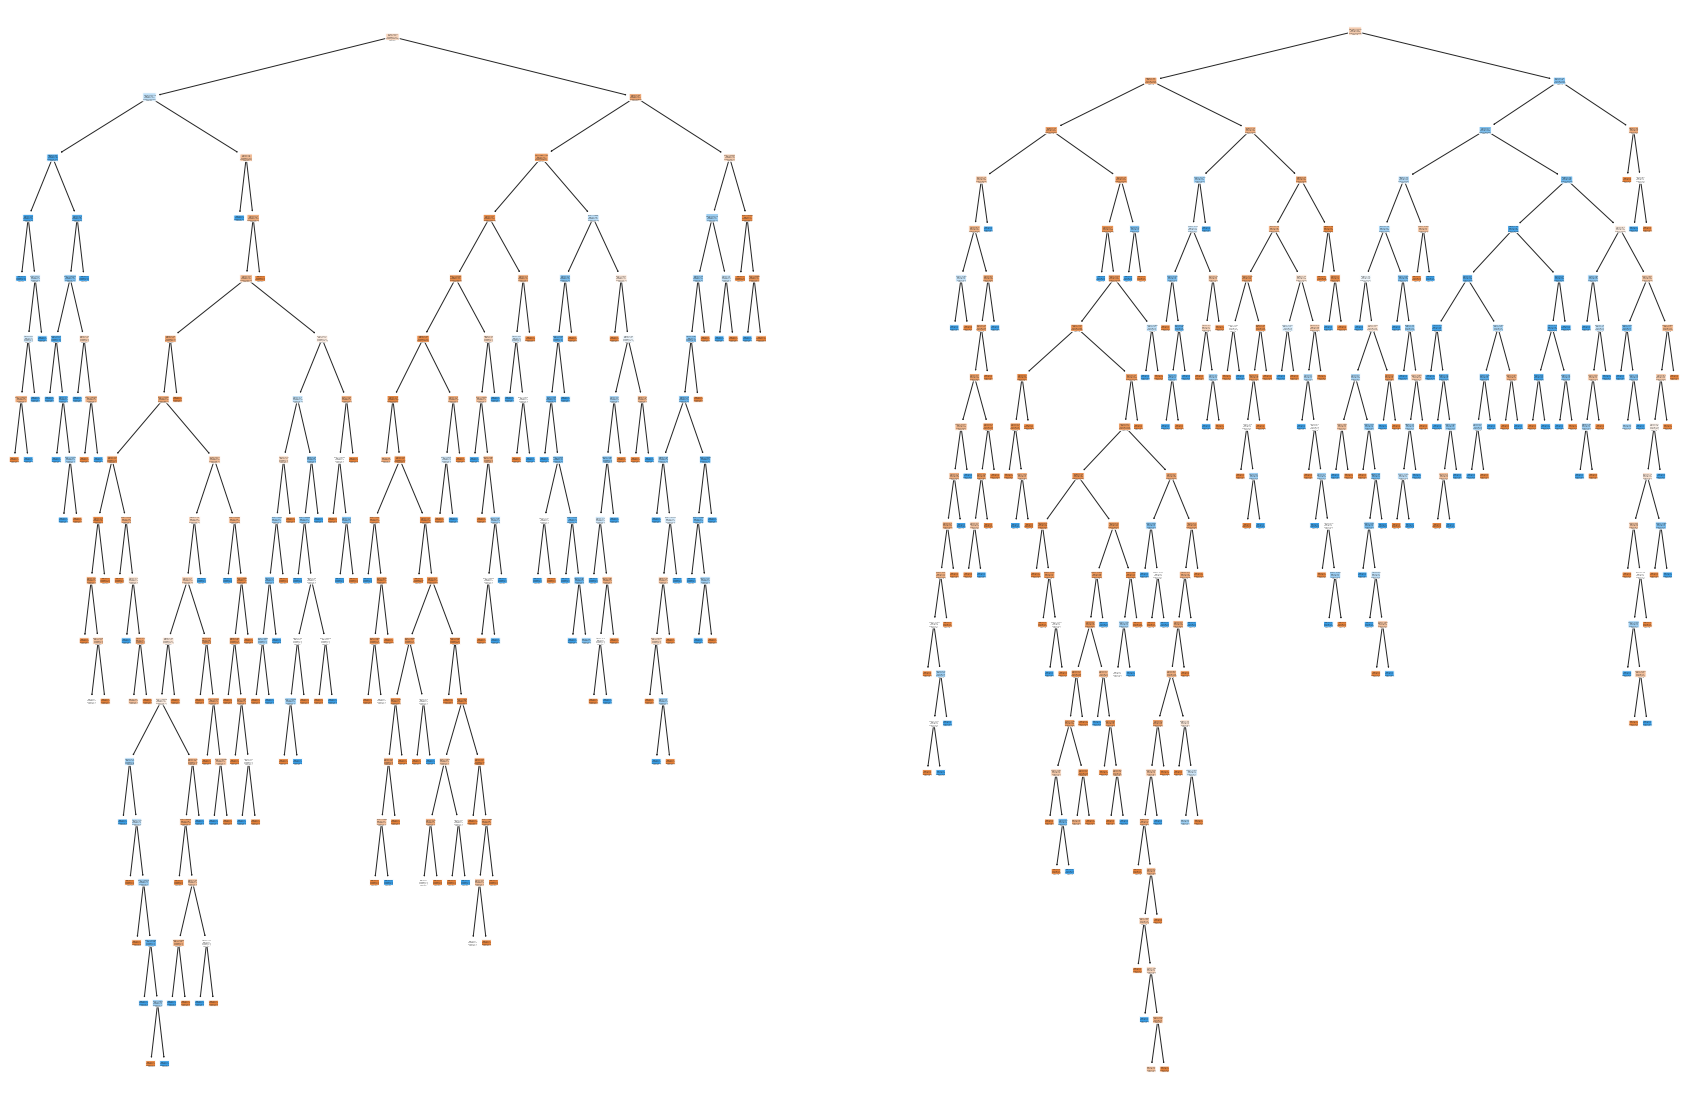

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [286]:
feature_names= X.columns.values
target_names = pd.Series(y,name="Survived").to_frame()

print(target_names['Survived'].unique())
print(X.columns.values)
fig, axes = plt.subplots(1,2, figsize=(30,20))

for i in range(len(axes)):
    fig = plt.figure()
    plot_tree(crf.estimators_[i],
              feature_names=feature_names,
              class_names= ["0","1"],
              filled=True,
              impurity=True,
              rounded=True,
              ax=axes[i])
plt.show()